# Marijuana Tax Revenue

Starting every Fiscal Year(FY) dating back to 2015, the first 40 million of the Retail Marijuana Excise Tax revenue was distributed back to the Public School Capital Construction Assistance Fund (PSCCAF).  Any excess will be transferred to the Public School Fund.  

Of the marijuana tax revenue already collected, the Colorado joint budget committee set aside 2.5 million to increase the number of health professionals in Colorado public schools.  In November 2014, the state awarded the first 975,000 in grants to Colorado schools to be used to hire health professionals.

The funds help fill a critical gap in Colorado school districts, which suffer from a shortage of school health workers due to 2011 budget cuts.  Many of the newly hired health workers, including nurses and social workers, will focus on mental health support and on programs to educate students about drug use.

The marijuana tax cash fund (71.85% of the 90% State Share), which receives the largest share of cannabis-related revenue, must be used for health care, health education, substance abuse prevention and treatment programs, and law enforcement.

In [1]:
#Dependencies and setup
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.dates import DateFormatter
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [2]:
#Load Marijuana Tax Revenue csv
tax_df = pd.read_csv("Resources/marijuana_tax.csv", dtype="object", encoding="utf-8")
tax_df

,Date,State Sales Tax,Retail Sales Tax,Retail Excise Tax (15%),License & Fees,Total Taxes & Fees,Total to Date
0,2/1/2014,"$1,330,209","$1,401,568","$195,318","$592,661","$3,519,756","$3,519,756"
1,3/1/2014,"$1,460,429","$1,434,916","$339,615","$857,615","$4,092,575","$7,612,330"
2,4/1/2014,"$1,569,405","$1,898,685","$609,907","$902,995","$4,980,992","$12,593,322"
3,5/1/2014,"$1,559,710","$2,217,607","$734,351","$761,687","$5,273,355","$17,866,677"
4,6/1/2014,"$1,569,454","$2,070,577","$1,135,648","$940,028","$5,715,707","$23,582,384"
...,...,...,...,...,...,...,...
76,6/1/2020,"$1,287,667","$22,814,211","$8,454,927","$1,067,803","$33,624,609","$1,375,145,032"
77,7/1/2020,"$1,288,715","$24,644,660","$9,381,481","$814,882","$36,129,738","$1,411,274,770"
78,8/1/2020,"$1,433,419","$27,794,380","$10,470,917","$996,898","$40,695,613","$1,451,970,383"
79,9/1/2020,"$1,339,939","$26,656,923","$9,682,085","$947,467","$38,626,414","$1,490,596,797"


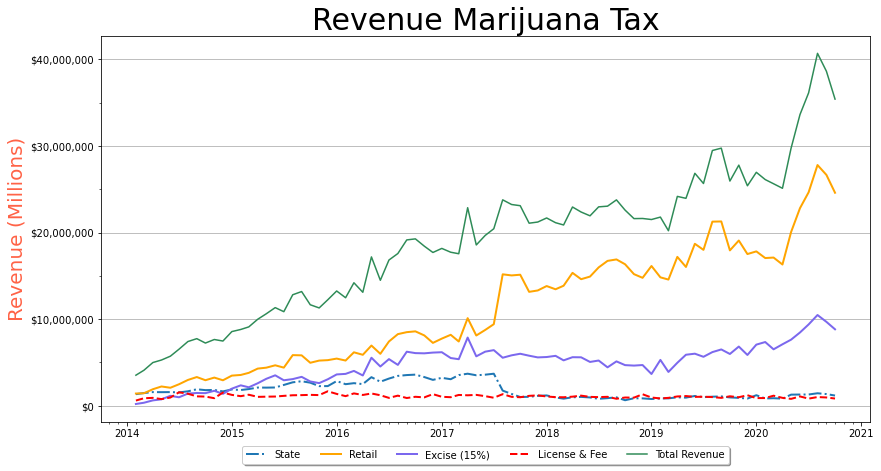

In [8]:
import matplotlib.dates as mdate
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator, StrMethodFormatter)

# Get data correctly from pandas
dates = tax_df["Date"].values
x_values = [dt.datetime.strptime(date, '%m/%d/%Y').date() for date in dates]
y_values1 = tax_df["State Sales Tax"].replace('[\$,]', '', regex=True).astype(float)
y_values2 = tax_df["Retail Sales Tax "].replace('[\$,]', '', regex=True).astype(float)
y_values3 = tax_df["Retail Excise Tax (15%)"].replace('[\$,]', '', regex=True).astype(float)
y_values4 = tax_df["License & Fees"].replace('[\$,]', '', regex=True).astype(float)
y_values5 = tax_df["Total Taxes & Fees"].replace('[\$,]', '', regex=True).astype(float)


fig, ax = plt.subplots()

ax.xaxis.set_major_locator(mdate.YearLocator())
ax.xaxis.set_minor_locator(mdate.MonthLocator())

ax.yaxis.set_major_locator(MultipleLocator(10000000))
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
ax.yaxis.set_minor_locator(MultipleLocator(5000000))


# Plots data
plt.plot(x_values, y_values1, "-.", lw = 2, label = "State")
plt.plot(x_values, y_values2, "-", color = "orange", lw = 2, label = "Retail")
plt.plot(x_values, y_values3,"-", color = "mediumslateblue", lw = 2, label = "Excise (15%)")
plt.plot(x_values, y_values4, "--", lw = 2, color = "red", label = "License & Fee")
plt.plot(x_values, y_values5, color="seagreen", label = "Total Revenue")

#create title, xaxis, and yaxis
plt.title("Revenue Marijuana Tax", fontsize = 30)
#plt.xlabel("Year", fontsize = 20, color = "tomato" )
plt.ylabel("Revenue (Millions)", fontsize = 20, color="tomato")
plt.tight_layout()

# plays with size
axes = plt.gca()
axes.yaxis.grid()
fig.set_size_inches(15,7)

# Legend
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)

#save image
plt.savefig("Images/marijuana_tax.png")
plt.show()